# MSDS599 Final Project: Yan Naing Aung, Lucie Schulz, Bhavesh Ram
**Evaluating Classifier Performance in Income Prediction: An Examination Using U.S. Census Data**

_"We confirm that each member contributed significantly and equally to the completion of the final project of MSDS-599. Through open and consistent communication, active participation, and a shared commitment to the project's success, all team members played an integral role in its development. Our collaborative efforts and equal contribution have been instrumental in achieving the project's objectives."_


In the endeavor of our Final Project, our team sought to assess the efficacy of various classifiers in predicting whether individuals, as reflected in US Census data, earn an annual income exceeding $50,000. Our study utilized a publicly available dataset found at https://archive.ics.uci.edu/ml/datasets/census+income, which encompasses over 32,000 observations.

The initial phase of our project was dedicated to data cleaning. This comprised the removal of missing values, the transformation of categorical variables into dummy variables, and the amalgamation of features exhibiting negligible variation. Further, we excluded features that did not yield interpretable insights. During this preliminary investigation, we identified a significant imbalance in our dataset, with 70% of observations representing individuals earning less than $50,000 annually. To address this skewness, we employed the Synthetic Minority Over-sampling Technique (SMOTE) to create a more balanced dataset. Our final dataframe contained 31,978 observations and 12 features split into 44 columns using dummy variables.

Subsequent to the data cleaning and balancing, we initiated exploratory data analysis, generating a variety of visualizations to enhance our understanding of the underlying data structure and relationships. The subsequent phase of our study involved the construction and evaluation of predictive models. We experimented with a selection of classifiers, namely Logistic Regression, K-Nearest Neighbors (KNN), Bagging, Decision Trees, Multi-Layer Perceptron, Random Forest, and Boosting.

Despite the diversity of models at our disposal, we faced a recurrent challenge – the models exhibited suboptimal recall in predicting individuals earning more than $50,000, even after extensive hyperparameter tuning. This suggested the potential presence of confounding features within the dataset or a possible absence of key predictive features, such as geographical location or family income.

Following these modifications, we retrained our three most promising models based on the weighted f1_score from the test set, employing the optimal hyperparameters identified in our previous iterations. The concluding phase of our study involved an in-depth analysis of these refined models.

In summation, our project underscores the iterative and evolving nature of data science, illustrating the ongoing cycle of model development, evaluation, refinement, and reiteration. The lessons learned from this course and project contributed to our understanding of income prediction using census data and emphasized the general necessity for high quality data, continuous improvement and adjustment in the face of complex, real-world Data Science Analysis.

_Notes about our Notebook:_

_In putting together this notebook, we have commented out certain sections of code, particularly those sections pertaining to hyperparameter tuning using Cross Validation and GridSearchCV. To reflect these results without running these computationally intensive sections of code (for your ease of use), we've included screenshots of the output from these sections and used the same best parameters in further analysis._

## Explanation of variables ##

Listing of attributes:

- Target variable: >50K, <=50K.
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('adult.csv', na_values=["?"])
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# original data set has 32561 observations
df.shape

(32561, 15)

In [5]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
age,32561.000000,38.581647,13.640433,17.000000,28.000000,37.000000,48.000000,90.000000
fnlwgt,32561.000000,189778.366512,105549.977697,12285.000000,117827.000000,178356.000000,237051.000000,1484705.000000
education.num,32561.000000,10.080679,2.572720,1.000000,9.000000,10.000000,12.000000,16.000000
capital.gain,32561.000000,1077.648844,7385.292085,0.000000,0.000000,0.000000,0.000000,99999.000000
capital.loss,32561.000000,87.303830,402.960219,0.000000,0.000000,0.000000,0.000000,4356.000000
hours.per.week,32561.000000,40.437456,12.347429,1.000000,40.000000,40.000000,45.000000,99.000000


In [6]:
object_describe=df.describe(include=["object"]).T 
object_describe

,count,unique,top,freq
workclass,30725,8,Private,22696
education,32561,16,HS-grad,10501
marital.status,32561,7,Married-civ-spouse,14976
occupation,30718,14,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native.country,31978,41,United-States,29170
income,32561,2,<=50K,24720


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# missing data in the data set
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Fill NA values for workclass and occupation with missing, might be interesting to see if refusing to answer those questions has predictive power to classify their income class.

In [9]:
# fill NA values for the columns workclass and occupation with missing since it's not feasible to 
# impute those variables and it might have predictive power if people refuse to report that information
df[['workclass', 'occupation']] = df[['workclass', 'occupation']].fillna('missing')

In [10]:
# check that NaN has been replaced with missing
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,missing,77053,HS-grad,9,Widowed,missing,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,missing,186061,Some-college,10,Widowed,missing,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
df.shape

(32561, 15)

In [12]:
# remove NA values from native country
df = df.dropna()

Removed the 583 missing values for native country as it cannot be correctly imputed via ML models.

In [13]:
# verified that 583 missing values have been removed
df.shape

(31978, 15)

## Data Visualization

This section will plot the original data set to better understand the underlying data.

In [14]:
#conda install -c conda-forge jupyter_contrib_nbextensions

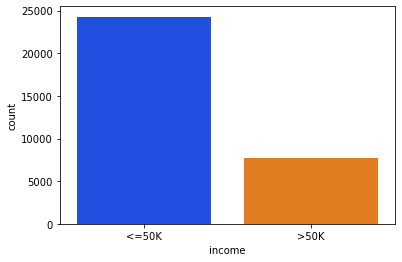

In [15]:
# plot who is earning above and below 50K - our prediction variable
sns.countplot(x='income', data = df, palette='bright')
plt.show()

In [16]:
df['income'].value_counts() / len(df) * 100

<=50K    75.936581
>50K     24.063419
Name: income, dtype: float64

The data set is imbalanced with 76% earning below 50K and 24% earning above 50K. This means our data set is imbalanced and we need to fix that before we train our prediction models.

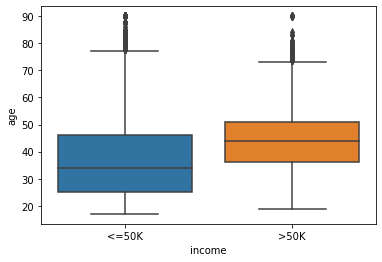

In [17]:
# boxplot for both classes and age
sns.boxplot(y='age',x='income',data=df)
plt.show()

The boxplot shows that people that earn more than 50K tend to be older than people earning less than 50K on average.

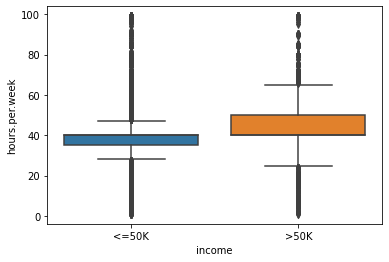

In [18]:
sns.boxplot(y='hours.per.week',x='income',data=df)
plt.show()

In [19]:
df['sex'].value_counts() / len(df) * 100

Male      66.827194
Female    33.172806
Name: sex, dtype: float64

The data set is split into 67% male and 33% female.

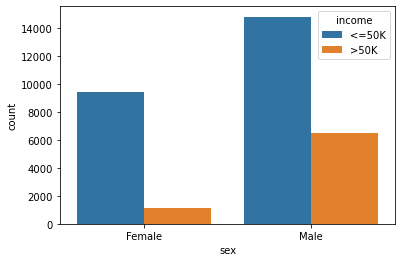

In [20]:
sns.countplot(x = df['sex'],hue=df['income'])
plt.show()

This bar chart shows that females are less likely to earn more than 50K compared to men

In [21]:
new_df = df.groupby(['sex', 'income']).count()
new_df['age']

sex     income
Female  <=50K      9446
        >50K       1162
Male    <=50K     14837
        >50K       6533
Name: age, dtype: int64

Women are less likely to earn more than 50K

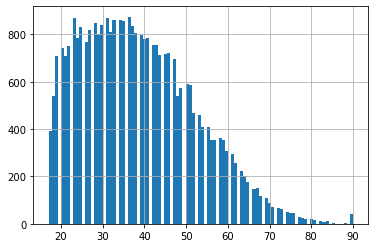

In [22]:
df['age'].hist(bins = 100)
plt.show()

The majority of people in the data set are between 20 and 40 years old

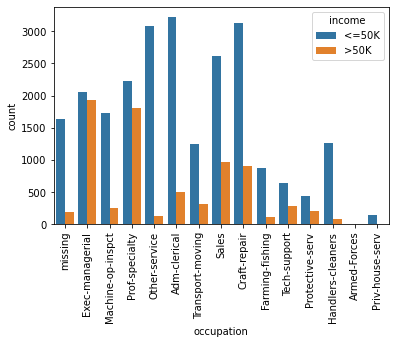

In [23]:
sns.countplot(x = df['occupation'],hue=df['income'])
plt.xticks(rotation=90)
plt.show()

This bar chart shows the distribution of people earning more or less than 50K based on their occupation. The occupations with the highest rate of people earning more than 50K are exec-mangerial and Prof-specialty, which makes intuitive sense.

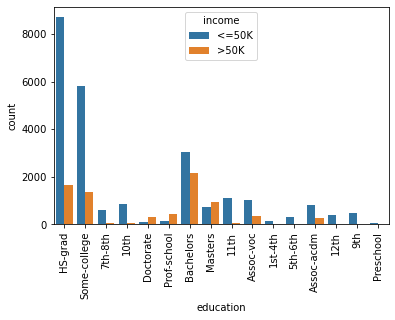

In [24]:
sns.countplot(x = df['education'],hue=df['income'])
plt.xticks(rotation=90)
plt.show()

This chart shows that there is a positive correlation between more education (Doctorate, Masters, Prof School) with earning more than 50K

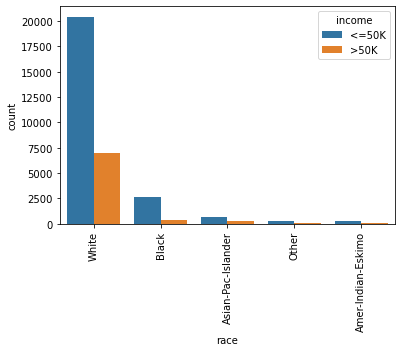

In [25]:
sns.countplot(x = df['race'],hue=df['income'])
plt.xticks(rotation=90)
plt.show()

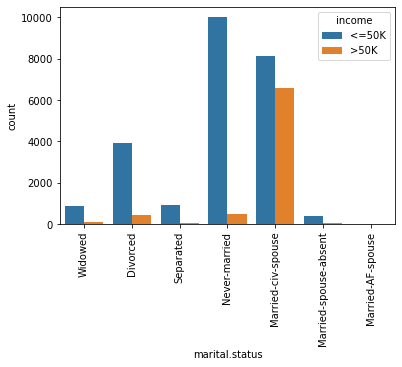

In [26]:
sns.countplot(x = df['marital.status'],hue=df['income'])
plt.xticks(rotation=90)
plt.show()

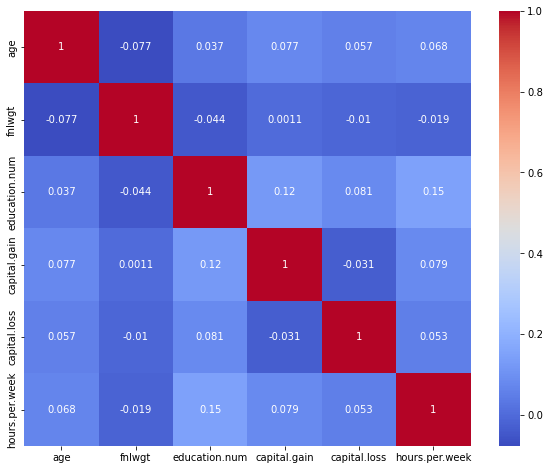

In [27]:
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')
plt.show()

The Correlation matrix shows that none of the explanatory variables are highly correlated. No risk of perfect multicollinearity occurring.

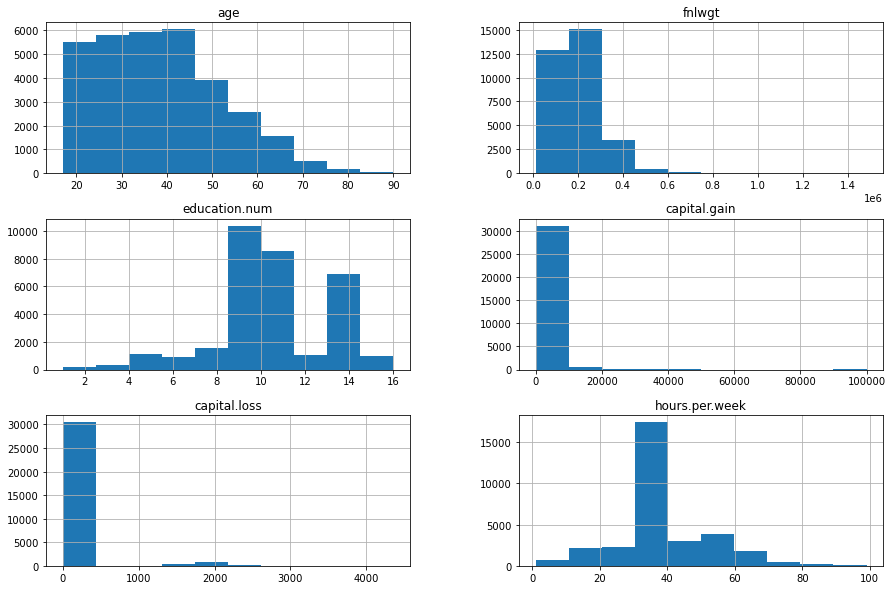

In [28]:
# distribution of numerical variables
plt.rcParams['figure.figsize'] = [15,10]
df.hist()
plt.show()

In [29]:
# majority of people from the US, so we combine all non US into one category
df['native.country'].value_counts() / len(df)

United-States                 0.912190
Mexico                        0.020108
Philippines                   0.006192
Germany                       0.004284
Canada                        0.003784
Puerto-Rico                   0.003565
El-Salvador                   0.003315
India                         0.003127
Cuba                          0.002971
England                       0.002814
Jamaica                       0.002533
South                         0.002502
China                         0.002345
Italy                         0.002283
Dominican-Republic            0.002189
Vietnam                       0.002095
Guatemala                     0.002001
Japan                         0.001939
Poland                        0.001876
Columbia                      0.001845
Taiwan                        0.001595
Haiti                         0.001376
Iran                          0.001345
Portugal                      0.001157
Nicaragua                     0.001063
Peru                     

In [30]:
# combine all NON US observations to reduce number of dummy variables
df['native.country'] = np.where(df['native.country'] != 'United-States', 'Not US', df['native.country'])

In [31]:
# Now only two categories US and not US exists for native country
df['native.country'].value_counts()

United-States    29170
Not US            2808
Name: native.country, dtype: int64

In [32]:
df.shape

(31978, 15)

## Create Dummy Variables

In [33]:
df = pd.get_dummies(df, columns = ['income'], drop_first = True)

In [34]:
df.shape

(31978, 15)

In [35]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income_>50K
0,90,missing,77053,HS-grad,9,Widowed,missing,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,missing,186061,Some-college,10,Widowed,missing,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


- dropping fnlwgt as it has no predictive power on income
- dropping education because there's already 'educ.num' that measures the years in school

In [36]:
df = df.drop('fnlwgt', axis=1)
df = df.drop('education', axis=1)

In [37]:
df = pd.get_dummies(df, columns = ['workclass'],drop_first = True)
df = pd.get_dummies(df, columns = ['marital.status'],drop_first = True)
df = pd.get_dummies(df, columns = ['occupation'],drop_first = True)
df = pd.get_dummies(df, columns = ['relationship'],drop_first = True)
df = pd.get_dummies(df, columns = ['race'], drop_first = True)
df = pd.get_dummies(df, columns = ['sex'], drop_first = True)
df = pd.get_dummies(df, columns = ['native.country'],drop_first = True)

In [38]:
df.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,income_>50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native.country_United-States
0,90,9,0,4356,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,82,9,0,4356,18,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,66,10,0,4356,40,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,54,4,0,3900,40,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
4,41,10,0,3900,40,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1


In [39]:
df.shape

(31978, 45)

## Split training and test data

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, f1_score

In [41]:
# splitting data into explanatory variables and target variable
X = df.drop(['income_>50K'], axis = 1)
y = df['income_>50K']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [43]:
X_train.shape

(25582, 44)

In [44]:
X_test.shape

(6396, 44)

## Balancing and Scaling our Dataset

In [45]:
#conda install -c conda-forge imbalanced-learn

In [46]:
import imblearn

In [47]:
# upsampling technique
from imblearn.over_sampling import SMOTE

In [48]:
oversample = SMOTE()

X_s_train, y_s_train = oversample.fit_resample(X_train, y_train)

In [49]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_s_train)
X_test_scaled = scaler.fit_transform(X_test)

In [50]:
X_train.shape

(25582, 44)

## Logistic Regression

In [51]:
# Basic Logistic Classifier
clf = LogisticRegression(random_state=0)
mod_lr = clf.fit(X_train_scaled, y_s_train)

In [52]:
print(classification_report(y_test,mod_lr.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.96      0.64      0.77      4843
           1       0.45      0.92      0.61      1553

    accuracy                           0.71      6396
   macro avg       0.71      0.78      0.69      6396
weighted avg       0.84      0.71      0.73      6396



In [53]:
pd.crosstab(y_test, mod_lr.predict(X_test_scaled),rownames=["True"], colnames=['Predicted'])

Predicted,0,1
True,,
0,3118,1725
1,131,1422


In [54]:
# # Logistic Regression hyperparameter grid
# param_grid = [    
#     {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
#     'max_iter' : [250, 1000,2500, 5000]
#     }
# ]

# # Create a Logistic Regression Classifier
# lgc = LogisticRegression(random_state=0)

# # Create a custom scorer using f1_score
# f1_scorer = make_scorer(f1_score, average='weighted')

# # Create the grid search object
# grid_searchLR = GridSearchCV(estimator=lgc, param_grid=param_grid, scoring=f1_scorer, cv=5)

# # Perform the grid search on the training data
# grid_searchLR.fit(X_train_scaled, y_s_train)

# # Get the best parameters and the corresponding score
# best_params = grid_searchLR.best_params_
# best_score = grid_searchLR.best_score_

# # Print the best parameters and score
# print("Best Parameters: ", best_params)
# print("Best Score (F1): ", best_score)






Best Parameters:  {'max_iter': 250, 'penalty' : '12', 'solver;' : 'sag'}
Best Score (F1): 0.863266608164751

In [55]:
#Best Logistic Classifier
clf = LogisticRegression(max_iter= 250, penalty= 'l2', solver= 'sag', random_state=0)
lr_best = clf.fit(X_train_scaled, y_s_train)


In [56]:
print(classification_report(y_test, lr_best.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.96      0.64      0.77      4843
           1       0.45      0.92      0.60      1553

    accuracy                           0.71      6396
   macro avg       0.71      0.78      0.69      6396
weighted avg       0.84      0.71      0.73      6396



In [57]:
LR_f1 = f1_score(lr_best.predict(X_test_scaled),y_test, average = 'weighted')
LR_f1

0.6890255349764189

# KNN Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
# standard KNN Clf
knn_clf = KNeighborsClassifier(n_neighbors=5)
nb1 = knn_clf.fit(X_train_scaled,y_s_train)

In [60]:
f1_score(nb1.predict(X_test_scaled),y_test)

0.6279416145367888

In [61]:
# #Create a list to store the results
# cvres=[]
# # Run through various values for k: use 5-fold cross validation, score with accuracy
# for i in range(1,25):
#     clf = KNeighborsClassifier(n_neighbors=i)
#     nn = cross_validate(clf, X_s_train, y_s_train, cv=5, scoring='f1')
#     #The test score gives an list of the accuracy on each of the five the test-folds
#     cvres.append(nn['test_score'].mean())

In [62]:
# plt.figure(figsize=(10, 8))
# plt.plot(list(range(1,25)),cvres,linewidth=2.5)
# plt.ylim(.8,0.88)
# plt.xlabel('neighbors')
# plt.ylabel('F1 Score')
# plt.show()

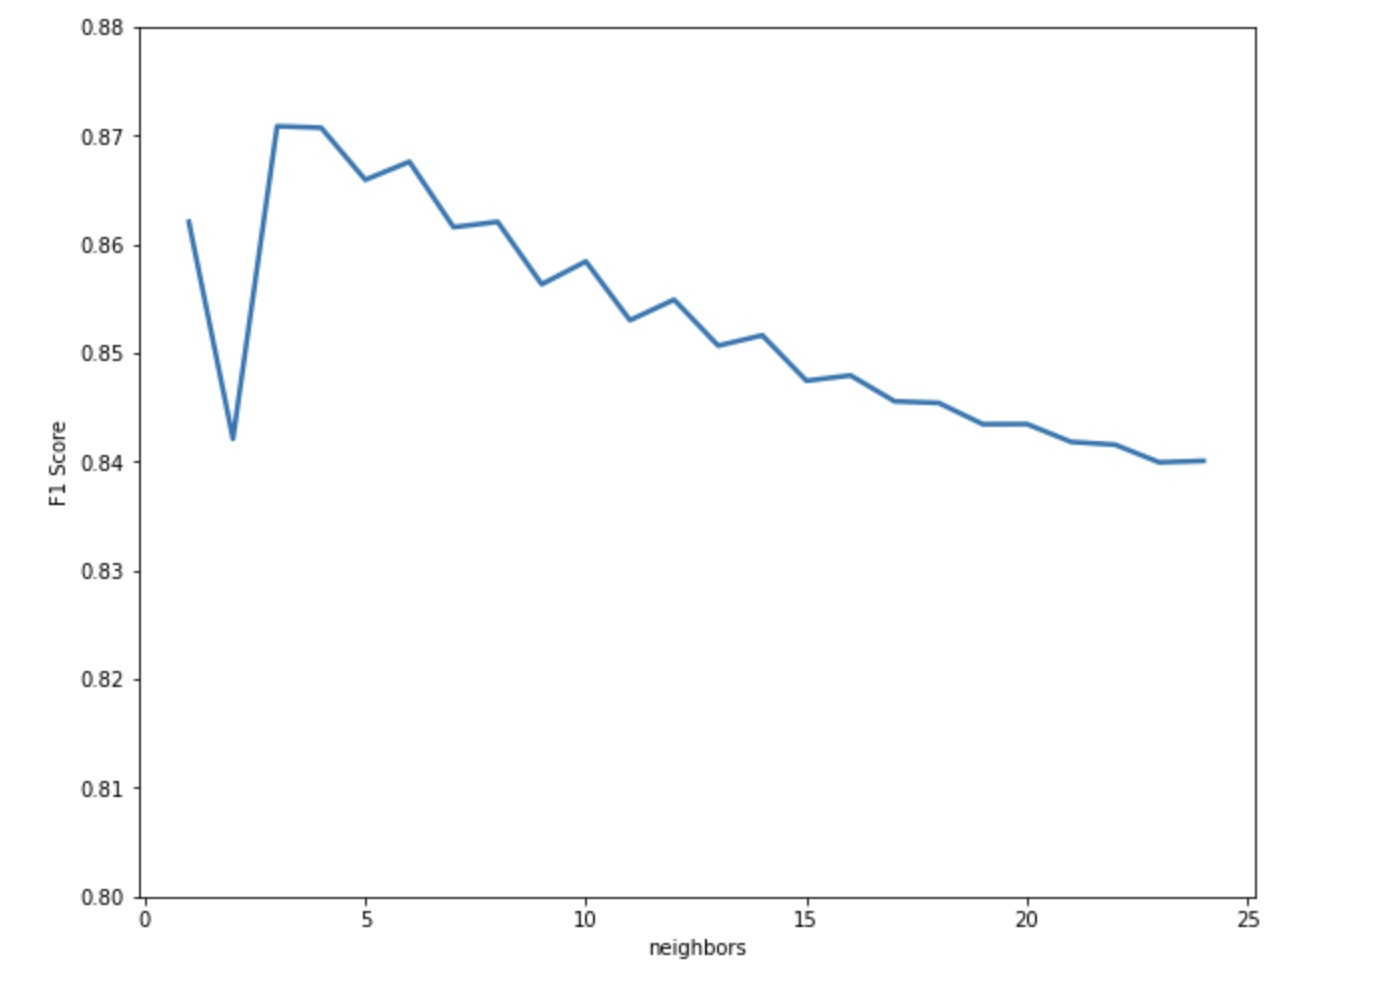

In [63]:
# np.argmax(cvres)

The best number of neighbors is at 3 per the graph above

In [64]:
# best KNN Clf after Cross Validation
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_best = knn_clf.fit(X_train_scaled,y_s_train)

In [65]:
print(classification_report(y_test,knn_best.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      4843
           1       0.58      0.65      0.61      1553

    accuracy                           0.80      6396
   macro avg       0.73      0.75      0.74      6396
weighted avg       0.81      0.80      0.81      6396



In [66]:
KNN_f1 = f1_score(knn_best.predict(X_test_scaled),y_test, average = 'weighted')
KNN_f1

0.79869611280124

# Bagging

In [67]:
from sklearn.ensemble import BaggingClassifier

In [68]:
# params_bg = {'n_estimators': [100, 300, 500, 700, 900]}

# bg_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier())

# grid_search_bg = GridSearchCV(bg_clf, param_grid = params_bg, cv = 5, scoring = 'f1')

# grid_search_bg.fit(X_s_train, y_s_train)

# best_model_bg = grid_search_bg.best_estimator_

# y_pred_bg = best_model_bg.predict(X_test)

# f1_bg = f1_score(y_test, y_pred_bg, average = 'weighted')

# print("Best parameters:", grid_search_bg.best_params_)
# print("Weighted F1 score:", f1_bg)

In [69]:
# df_gs_bg = pd.DataFrame.from_dict(grid_search_bg.cv_results_)
# df_gs_bg.head()

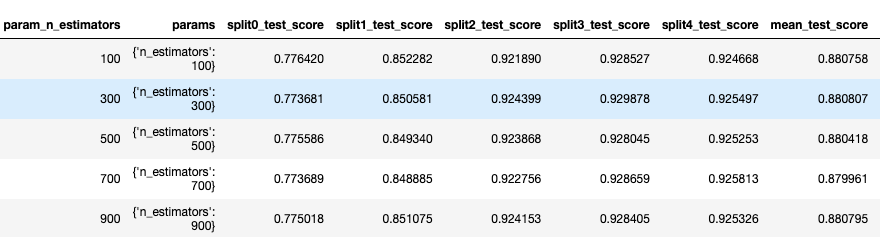

In [70]:
bg_clf_best = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 300, random_state = 0)
bg_clf_best = bg_clf_best.fit(X_s_train, y_s_train)
BG_f1 = f1_score(bg_clf_best.predict(X_test), y_test, average = 'weighted')
BG_f1

0.8331087187755222

In [71]:
print(classification_report(y_test,bg_clf_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4843
           1       0.65      0.67      0.66      1553

    accuracy                           0.83      6396
   macro avg       0.77      0.78      0.78      6396
weighted avg       0.84      0.83      0.83      6396



In [72]:
# As we can see from the classification report, the bagging model is fairly good at predicting zeros (income below 50k) from the dataset.

# Decision Tree

In [73]:
# params_dt = {'max_depth': [10,20,30,40,50]}

# dt_clf = DecisionTreeClassifier(random_state = 0)

# grid_search_dt = GridSearchCV(dt_clf, param_grid = params_dt, cv = 5, scoring = 'f1')

# grid_search_dt.fit(X_s_train, y_s_train)

# best_model_dt = grid_search_dt.best_estimator_

# y_pred_dt = best_model_dt.predict(X_test)

# f1_dt = f1_score(y_test, y_pred_dt, average = 'weighted')

# print("Best parameters:", grid_search_dt.best_params_)
# print("F1 score:", f1_dt)

In [74]:
# df_gs_dt = pd.DataFrame.from_dict(grid_search_dt.cv_results_)
# df_gs_dt.head()

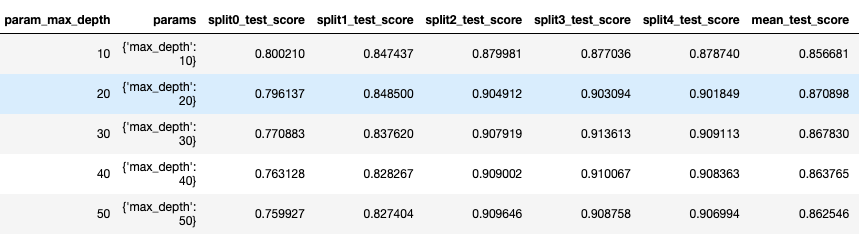

In [75]:
dt_clf_best = DecisionTreeClassifier(max_depth = 20, random_state = 0)
dt_clf_best = dt_clf_best.fit(X_s_train, y_s_train)
DT_f1 = f1_score(dt_clf_best.predict(X_test), y_test, average = 'weighted')
DT_f1

0.8130953515362849

In [76]:
print(classification_report(y_test,dt_clf_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      4843
           1       0.60      0.77      0.67      1553

    accuracy                           0.82      6396
   macro avg       0.76      0.80      0.77      6396
weighted avg       0.84      0.82      0.83      6396



In [77]:
# The decision tree model improved greatly on recall where it correctly predicted people who had income of over 50k at 71% over 64% at bagging model.

**Multi-Layer Perceptron**

In [78]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)


mlp.fit(X_s_train, y_s_train)

# Predict the test set results
y_pred = mlp.predict(X_test)

# Check the performance of the model

test_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Test Set F1 Score: ", test_f1_score)

report = classification_report(y_test, y_pred)

print(report)


Test Set F1 Score:  0.8343943508460593
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      4843
           1       0.62      0.77      0.69      1553

    accuracy                           0.83      6396
   macro avg       0.77      0.81      0.78      6396
weighted avg       0.85      0.83      0.83      6396



In [79]:
f1mlp = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1mlp)


F1 score: 0.8343943508460593


In [80]:
print(classification_report(y_test,mlp.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      4843
           1       0.62      0.77      0.69      1553

    accuracy                           0.83      6396
   macro avg       0.77      0.81      0.78      6396
weighted avg       0.85      0.83      0.83      6396



In [81]:
# # MLP hyperparameter grid
# param_grid = {
#     'hidden_layer_sizes': [(10,10), (25,25), (50, 50)],
#     'alpha': [0.0001, 0.001, 0.01],
#     'max_iter': [300]
# }

# # Create an MLP classifier
# mlp = MLPClassifier(random_state=0)

# # Create a custom scorer using f1_score
# f1_scorer = make_scorer(f1_score, average='weighted')

# # Create the grid search object
# grid_searchMLP = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring=f1_scorer, cv=5)

# # Perform the grid search on the training data
# grid_searchMLP.fit(X_s_train, y_s_train)

# # Get the best parameters and the corresponding score
# best_params = grid_searchMLP.best_params_
# best_score = grid_searchMLP.best_score_

# # Print the best parameters and score
# print("Best Parameters: ", best_params)
# print("Best Score (F1): ", best_score)

# # Evaluate the model on the test set
# y_pred = grid_searchMLP.predict(X_test_scaled)
# test_f1_score = f1_score(y_test, y_pred, average='weighted')
# print("Test Set F1 Score: ", test_f1_score)

# report = classification_report(y_test, y_pred)
# print(report)


Best Parameters:  {'alpha': 0.001, 'hidden_layer_sizes': (25, 25), 'max_iter': 300}

Best Score (F1):  0.8666554063053423

Test Set F1 Score:  0.7034932446517811

              precision    recall  f1-score   support

           0       0.90      0.65      0.76      4843
           1       0.42      0.77      0.54      1553

 

Cross Validation Results:

Best Parameters:  {'alpha': 0.001, 'hidden_layer_sizes': (25, 25), 'max_iter': 300}
Best Score (F1):  0.8666554063053423
Test Set F1 Score:  0.7034932446517811
              precision    recall  f1-score   support

           0       0.90      0.65      0.76      4843
           1       0.42      0.77      0.54      1553

    accuracy                           0.68      6396



In [82]:
# df_MLPcv = pd.DataFrame.from_dict(grid_searchMLP.cv_results_)
# df_MLPcv.head()

Best MLP Model

In [83]:
#Best MLP Model

bestmlp = MLPClassifier(alpha = 0.001, hidden_layer_sizes=(25,25), max_iter=300)
bestmlp.fit(X_s_train, y_s_train)

# Predict the test set results
y_pred = bestmlp.predict(X_test)

# Check the performance of the model
test_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Best MLP Test Set F1 Score: ", test_f1_score)

report = classification_report(y_test, y_pred)

print(report)


Best MLP Test Set F1 Score:  0.8317238027857752
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      4843
           1       0.61      0.78      0.68      1553

    accuracy                           0.83      6396
   macro avg       0.77      0.81      0.78      6396
weighted avg       0.85      0.83      0.83      6396



# Random Forest

In [84]:
rf = RandomForestClassifier(n_estimators=400,max_features='sqrt',random_state=0).fit(X_train, y_train)

In [85]:
y_predRF = rf.predict(X_test)

In [86]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4843
           1       0.72      0.63      0.67      1553

    accuracy                           0.85      6396
   macro avg       0.80      0.78      0.79      6396
weighted avg       0.85      0.85      0.85      6396



In [87]:
f1rf = f1_score(y_test, y_predRF, average='weighted')
print("F1 score:", f1rf)


F1 score: 0.846940180696696


Without cross-validation, the weighted F1 score for the Random Forest is 0.84. 
From the classification report above, we can see that the model is still having a tough time with false negatives, given the recall for predicting 1's (those observations that are more than $50k)

Let's see if we can improve this with parameter tuning.

In [88]:
# # Random Forest hyperparameter grid
# param_grid = {
#     'n_estimators': [10, 50, 100, 400, 1000],
#     'criterion': ['gini'],
#     'max_depth': [None, 10, 20, 40],
#     'max_features': ['sqrt']
# }

# # Create a Random Forest Classifier
# rfc = RandomForestClassifier(random_state=0)

# # Create a custom scorer using f1_score
# f1_scorer = make_scorer(f1_score, average='weighted')

# # Create the grid search object
# grid_searchRF = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring=f1_scorer, cv=5)

# # Perform the grid search on the training data
# grid_searchRF.fit(X_s_train, y_s_train)

# # Get the best parameters and the corresponding score
# best_params = grid_searchRF.best_params_
# best_score = grid_searchRF.best_score_

# # Print the best parameters and score
# print("Best Parameters: ", best_params)
# print("Best Score (F1): ", best_score)




Best Parameters:  {'criterion': 'gini', 'max_depth': 40, 'max_features': 'sqrt', 'n_estimators': 1000}

Best Score (F1):  0.8900461931775352

In [89]:
# df_RFcv = pd.DataFrame.from_dict(grid_searchRF.cv_results_)
# df_RFcv.head()

In [90]:
# # Evaluate the model on the test set
# y_pred = grid_searchRF.predict(X_test)
# test_f1_score = f1_score(y_test, y_pred, average='weighted')
# print("Test Set F1 Score: ", test_f1_score)

# report = classification_report(y_test, y_pred)
# print(report)

Test Set F1 Score:  0.8399585113438829

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      4843
           1       0.66      0.68      0.67      1553



**Best Random Forest Model**

In [96]:
rf = RandomForestClassifier(n_estimators=1000, max_features='sqrt', max_depth = 40, criterion = 'gini', random_state=0).fit(X_train, y_train)
y_predRF = rf.predict(X_test)

f1rf = f1_score(y_test, y_predRF, average='weighted')
print("F1 score:", f1rf)


F1 score: 0.8469192898133088


# Boosting

We build, train, test and compare four different Boosting Classifiers, as some have features which offer greater efficiency (XGBoost), help in classifying data with weak predictors (CatBoost) or support adaptive re-weighting that might be useful in picking up nuanced differences between observations in the training data (AdaBoost).

In [97]:
#!pip install xgboost
#!pip install catboost

In [98]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier


classifiers = {
    "Boost": GradientBoostingClassifier(n_estimators=250,max_depth=3,learning_rate=0.1,random_state=0),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',random_state=0),
    "CatBoost": CatBoostClassifier(verbose=0, n_estimators=250,random_state=0),
    "AdaBoost": AdaBoostClassifier(n_estimators=250,random_state=0),
}


for key, classifier in classifiers.items():
    classifier.fit(X_s_train, y_s_train)
    y_pred = classifier.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')  
    print(classification_report(y_test, y_pred))
    print(f"{key} F1 Score: {f1 * 100.0}%")


C:\Users\bhave\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


              precision    recall  f1-score   support

           0       0.92      0.86      0.89      4843
           1       0.64      0.78      0.71      1553

    accuracy                           0.84      6396
   macro avg       0.78      0.82      0.80      6396
weighted avg       0.86      0.84      0.85      6396

Boost F1 Score: 84.71661140685836%
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      4843
           1       0.68      0.76      0.72      1553

    accuracy                           0.86      6396
   macro avg       0.80      0.82      0.81      6396
weighted avg       0.86      0.86      0.86      6396

XGBoost F1 Score: 85.80352260017598%
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      4843
           1       0.67      0.77      0.72      1553

    accuracy                           0.85      6396
   macro avg       0.80      0.82      0.81      6396
we

In [99]:

# #Ran for almost 40 mins

# #parameters for grid search

# boost_params = {
#     'n_estimators': [100, 200, 500],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
# }


# xgb_params = {
#     'n_estimators': [100, 200, 500],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
# }

# cat_params = {
#     'iterations': [100, 200, 500],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'depth': [3, 5, 7],
# }

# ada_params = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.05, 0.1],
# }

# classifiers = {
#     "Boost": (GradientBoostingClassifier(random_state=0), boost_params),
#     "XGBoost": (XGBClassifier(use_label_encoder=False,random_state=0), xgb_params),
#     "CatBoost": (CatBoostClassifier(verbose=0,random_state=0), cat_params),
#     "AdaBoost": (AdaBoostClassifier(random_state=0), ada_params),
# }

# # Fit the models and print results
# for key, (classifier, params) in classifiers.items():
#     grid_boost = GridSearchCV(estimator=classifier, param_grid=params, cv=5, scoring='f1_weighted')
#     grid_boost.fit(X_s_train, y_s_train)
#     print(f"{key} Best Parameters: {grid_boost.best_params_}" )
#     print(f"{key} Best F1 Score: {grid_boost.best_score_}")


In [100]:
# # Evaluate the model on the test set
# y_pred = grid_boost.predict(X_test)
# test_f1_score = f1_score(y_test, y_pred, average='weighted')
# print("Test Set F1 Score: ", test_f1_score)

# report = classification_report(y_test, y_pred)
# print(report)

In [101]:
# df_Boostcv = pd.DataFrame.from_dict(grid_boost.cv_results_)
# df_Boostcv.head()

Test Set F1 Score:  0.8212750811696571

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      4843
           1       0.58      0.82      0.68      1553



Boost Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}

Boost Best F1 Score: 0.8926342770512428

XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}

XGBoost Best F1 Score: 0.892788312044576

CatBoost Best Parameters: {'depth': 7, 'iterations': 500, 'learning_rate': 0.1}

CatBoost Best F1 Score: 0.8908227865996807

AdaBoost Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}

AdaBoost Best F1 Score: 0.8498994485534151

In [118]:
#Best Boosting Models

classifiers = {
    "Boosting": GradientBoostingClassifier(n_estimators=500,max_depth=7,learning_rate=0.1,random_state=0),
    "XGBoost": XGBClassifier(n_estimators=500,max_depth=7,learning_rate=0.1,random_state=0),
    "CatBoost": CatBoostClassifier(max_depth=7, learning_rate=0.1, iterations = 500, random_state=0),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=0),
}

f1_scores = {}

for key, classifier in classifiers.items():
    classifier.fit(X_s_train, y_s_train)
    y_pred = classifier.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')  
    print(classification_report(y_test, y_pred))
    f1 = f1_score(y_test, y_pred, average='weighted')  # Here we calculate the F1 score
    f1_scores[key] = f1  # And here we store it in the dictionary
    print(f"{key} F1 Score: {f1 * 100.0}%")


              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4843
           1       0.69      0.73      0.71      1553

    accuracy                           0.85      6396
   macro avg       0.80      0.81      0.81      6396
weighted avg       0.86      0.85      0.86      6396

Boosting F1 Score: 85.54293901756327%
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      4843
           1       0.69      0.75      0.72      1553

    accuracy                           0.86      6396
   macro avg       0.80      0.82      0.81      6396
weighted avg       0.86      0.86      0.86      6396

XGBoost F1 Score: 85.8605897327246%
0:	learn: 0.6105390	total: 18.8ms	remaining: 9.38s
1:	learn: 0.5572221	total: 39.8ms	remaining: 9.92s
2:	learn: 0.5152413	total: 60.6ms	remaining: 10s
3:	learn: 0.4835566	total: 81.8ms	remaining: 10.1s
4:	learn: 0.4634539	total: 104ms	remaining: 10.3s
5:	learn: 0.4411783	

In [119]:
print(f1_scores)

{'Boosting': 0.8554293901756327, 'XGBoost': 0.8586058973272461, 'CatBoost': 0.8565089270733233, 'AdaBoost': 0.8188319762004712}


## Model Summary

**Weighted F1 Score of Models with best parameters**

In [120]:
# print('LR:', LR_f1)
# print('KNN:', KNN_f1)
# print('Bagging:', BG_f1)
# print('Decision Tree:', DT_f1)
# print('MLP:', test_f1_score )
# print('Random Forest:', f1rf )
# print('Boosting:', f1_scores )

LR: 0.6890255349764189

KNN: 0.79869611280124

Bagging: 0.8331087187755222

Decision Tree: 0.8130953515362849

MLP: 0.8317238027857752

Random Forest: 0.8469192898133088

Boosting: {'Boosting': 0.8554293901756327, 'XGBoost': 0.8586058973272461, 'CatBoost': 0.8565089270733233, 'AdaBoost': 0.8188319762004712}

Based on the weighted F1 scores above, the top 3 models are Bagging, Random Forest and Boosting (with XGboost having the highest F1 Score).

# Outlier Elimination / Data Refinement

In [105]:
df.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,income_>50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native.country_United-States
0,90,9,0,4356,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,82,9,0,4356,18,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,66,10,0,4356,40,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,54,4,0,3900,40,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
4,41,10,0,3900,40,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1


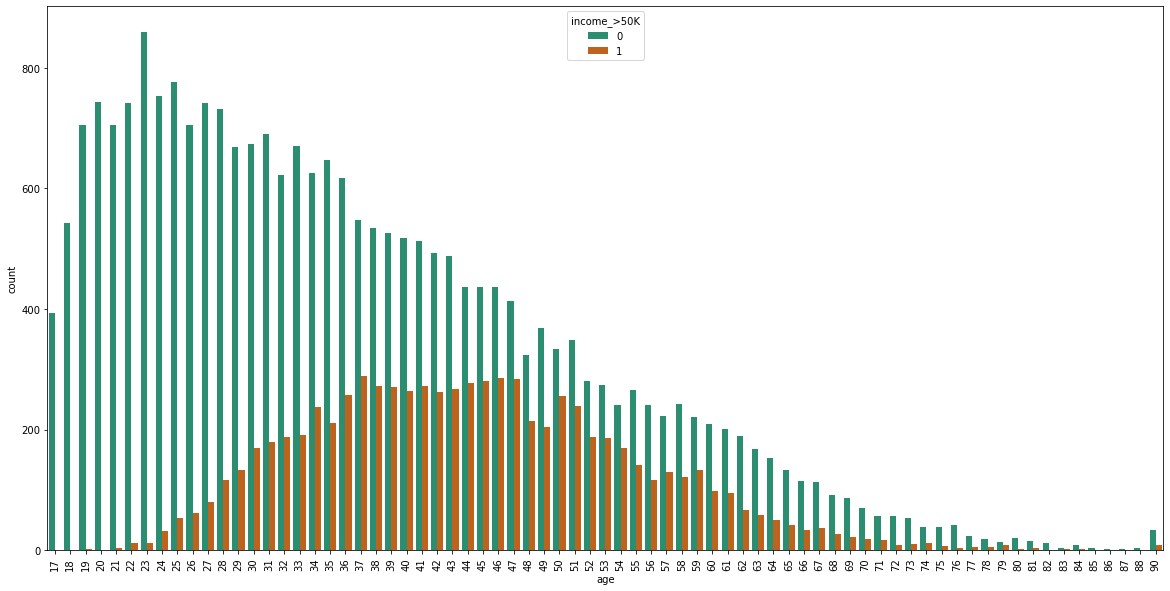

In [106]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x = df['age'],hue=df['income_>50K'], palette = "Dark2", ax=ax)

plt.xticks(rotation=90)
plt.show()

## Refined Dataset: Restricting age between 25 and 70

As we can see from the plot we have more people in the dataset that earn less than 50K and those are mainly between 17 and 30. In order to improve our models ability to predict if someone earns more than 50K or not, we will remove very young people from the data set to have a more even dataset and hopefully improve the models ability to predict if someone earns more than 50K. We will compare those model with the adjusted data set to models that use the whole data set.

In [107]:
df_age = df.loc[(df['age']<70) & (df['age']> 25)]
df_age.shape

(25025, 45)

In [108]:
len(df) - len(df_age)

6953

Applying the age filter removed about 7000 observations from the dataset

In [109]:
X2 = df_age.drop(['income_>50K'], axis = 1)
y2 = df_age['income_>50K']

X2 and y2 are derived from the new dataframe only including observations with age between 25 and 70.

In [110]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

In [111]:
X2_s_train, y2_s_train = oversample.fit_resample(X2_train, y2_train)

In [112]:
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.fit_transform(X2_test)
X2s = scaler.fit_transform(X2)

**In this section, we fit our models tuned with the best hyperparameters on the age-restricted dataset**

# Bagging

In [113]:
bg_clf_best = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 300, random_state = 0)
bg_clf_best = bg_clf_best.fit(X2_s_train, y2_s_train)
BG_f1 = f1_score(bg_clf_best.predict(X2_test), y2_test, average = 'weighted')
BG_f1

0.7973276398864734

# Random Forest

In [115]:
#Best RF Model

rf = RandomForestClassifier(n_estimators=1000, max_features='sqrt', max_depth = 40, criterion = 'gini', random_state=0).fit(X2_s_train, y2_s_train)
y2_predRF = rf.predict(X2_test)

f1rf = f1_score(y2_test, y2_predRF, average='weighted')
print("F1 score:", f1rf)
print(report)

F1 score: 0.8113454889231255
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      3546
           1       0.70      0.67      0.68      1459

    accuracy                           0.82      5005
   macro avg       0.78      0.77      0.78      5005
weighted avg       0.82      0.82      0.82      5005



# Boosting Models

In [116]:
#Best Boosting Models

classifiers = {
    "Boosting": GradientBoostingClassifier(n_estimators=500,max_depth=7,learning_rate=0.1,random_state=0),
    "XGBoost": XGBClassifier(n_estimators=500,max_depth=7,learning_rate=0.1,random_state=0),
    "CatBoost": CatBoostClassifier(max_depth=7, learning_rate=0.1, iterations = 500, random_state=0),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=0),
}


for key, classifier in classifiers.items():
    classifier.fit(X2_s_train, y2_s_train)
    y_pred = classifier.predict(X2_test)
    f1 = f1_score(y2_test, y_pred, average='weighted')  
    print(classification_report(y2_test, y_pred))
    f1 = f1_score(y2_test, y_pred, average='weighted')  # Here we calculate the F1 score
    f1_scores[key] = f1  # And here we store it in the dictionary
    print(f"{key} F1 Score: {f1 * 100.0}%")


C:\Users\bhave\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


              precision    recall  f1-score   support

           0       0.89      0.86      0.87      3546
           1       0.68      0.73      0.70      1459

    accuracy                           0.82      5005
   macro avg       0.78      0.79      0.79      5005
weighted avg       0.83      0.82      0.82      5005

Boosting F1 Score: 82.35187035119758%
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      3546
           1       0.68      0.75      0.72      1459

    accuracy                           0.83      5005
   macro avg       0.79      0.80      0.79      5005
weighted avg       0.83      0.83      0.83      5005

XGBoost F1 Score: 82.79397420767262%
0:	learn: 0.6315341	total: 21.2ms	remaining: 10.6s
1:	learn: 0.5876685	total: 39ms	remaining: 9.7s
2:	learn: 0.5495450	total: 63.4ms	remaining: 10.5s
3:	learn: 0.5254725	total: 84.3ms	remaining: 10.5s
4:	learn: 0.5069210	total: 107ms	remaining: 10.6s
5:	learn: 0.4888204	

In [117]:
print(f1_scores)

{'Boosting': 0.8235187035119758, 'XGBoost': 0.8279397420767262, 'CatBoost': 0.8308186640977481, 'AdaBoost': 0.8065569415608157}



# Conclusion

In this research endeavor, we have constructed, trained, evaluated, and fine-tuned an array of predictive models. A close examination of the performance metrics associated with each model illuminated a distinct trend: our classifiers demonstrated increased proficiency in predicting the income of individuals earning less than $50,000 per annum compared to those earning more.

By strategically refining our dataset to exclude potential outliers that could confound our classifiers — specifically, by limiting the age range — we observed a marginal enhancement in our models' performance. This was most notable in the improved recall of positive predictions, signified by a decrease in false negatives among high-income individuals, at the expense of precision (specifically for predicting those individuals who did not fall into the high income category).

We theorize that this challenge could be partly attributable to the data collection methodology. For instance, the annual Capital Gain is capped at $99,999, thereby restricting the granularity of our data. Furthermore, we acknowledge the absence of certain features in the survey data that could potentially correlate strongly with income (ommited variables). These include family income, college major, geographic location, and overall health status, among others.

To encapsulate our findings, we present a detailed overview of the performance of our fine-tuned models.

As a team, we extend our gratitude to the U.S. Census Bureau for their diligent data collection, UCI for maintaining the Machine Learning Repository which provided us with access to this dataset, and to our esteemed Professor Stephen Devlin. His engaging course has truly stimulated our interest in data science and machine learning methodologies, fostering a deeper understanding of the practical challenges and the critical thinking involved in handling real-world data and equipping us with a toolkit to take on the challenge of meaningful analysis. This project has been an invaluable learning experience, and we look forward to applying the insights gained to our future research endeavors.




